# Project 2: Ames Housing Saleprice Challenge

## Problem Statement

- The aim of this project is to use linear model to best predict the price of houses in Ames at sale. 

- The linear models that will be used are Linear Regression, LASSO, Ridge and Elastic Net. Therefore, my problem statement would be which linear model best predict the price of houses in Ames at sale and which features are the best predictors of housing price? 
 
- The success of a model will be measured using R-square on unseen data and the RMSE score given by Kaggle.
 
- The scope of the project is confined to the Ames dataset and linear models only. The model will be tuned closely to the Ames dataset and some features in the dataset are vey specific to Ames. Therefore, the model may not be a perfect fit for other housing data in the U.S.
 
- This project is relevant to primary stakeholders: Developers, Home Sellers, Home Buyers and Housing Agents. The secondary stakeholder is the city coucil. Developers, home sellers and housing agents can use the model developed to understand which are the features that influence sale price. During design and marketing, developers, home sellers and agents could focus on the identified features to maximise sale price. As for home buyers, the model can be used to estimate the actual price of a house so buyers can give an appropriate offer to seller to increase the chances of securing their desired property. The city council can use the model for city planning, for example allowing what type of houses to be built and how much land to be release to developer. 

## Executive Summary

### Contents:
- [1. Importing the Libraries](#1.-Importing-the-Libraries)
- [2. Importing Datasets](#2.-Importing-Datasets)
- [3. Inspection of Training and Test Dataset](#3.-Inspection-of-Training-and-Test-Dataset)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. Pre-processing](#5.-Pre-processing)
- [6. Exploratory Data Analysis (EDA)](#6.-Exploratory-Data-Analysis-(EDA))
- [7. Create Feature Matrix and Target](#7.-Create-Feature-Matrix-and-Target)
- [8. Model Selection](#8.-Model-Selection)
- [9. Output Model Predictions](#9.-Output-Model-Predictions)
- [10. Business Recommendations](#10.-Business-Recommendations)
- [11. Future Steps](#11.-Future-Steps)

## 1. Importing the Libraries

In [70]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV  
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

from IPython.display import Image
from IPython.core.display import HTML

import datetime as dt

## 2. Importing Datasets

In [71]:
pth = "../Project 2/datasets/"
df_train = pd.read_csv(pth + "train.csv")
df_test = pd.read_csv(pth + "test.csv")

## 3. Inspection of Training and Test Dataset

In [72]:
df_train.head() 
# Looking at first 5 rows
# Seems like many missing data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [73]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [74]:
len(df_train.columns) # 81 columns

81

In [75]:
len(df_test.columns)

80

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

### Comments

1. Variables to be dropped:
    - PID will be removed because its just parcel identification number. It does not contribute to the prediction of housing price.

2. Variables to be one hot encoded:
    - MS SubClass
    - MS Zoning
    - Street
    - Alley
    - Lot Shape (Ordinal)
    - Land Contour
    - Utilities (Ordinal)
    - Lot Config
    - Land Slope (Ordinal)
    - Neighborhood
    - Condition 1
    - Condition 2
    - Bldg Type
    - House Style
    - Overall Qual (Ordinal)
    - Overall Cond (Ordinal)
    - Roof Style
    - Roof Matl
    - Exterior 1 
    - Exterior 2
    - Mas Vnr Type 
    - Exter Qual (Ordinal)
    - Exter Cond (Ordinal)
    - Foundation
    - Bsmt Qual (Ordinal)
    - Bsmt Cond (Ordinal)
    - Bsmt Exposure (Ordinal)
    - BsmtFin Type 1 (Ordinal)
    - BsmtFinType 2 (Ordinal)
    - Heating
    - HeatingQC (Ordinal)
    - Central Air
    - Electrical (Ordinal)
    - KitchenQual (Ordinal)
    - Functional (Ordinal)
    - FireplaceQu (Ordinal)
    - Garage Type
    - Garage Finish (Ordinal)
    - Garage Qual (Ordinal)
    - Garage Cond (Ordinal)
    - Paved Drive (Ordinal)
    - Pool QC (Ordinal)
    - Fence (Ordinal)
    - Misc Feature
    - Sale Type
    - Sale Condition

In [78]:
# Proceed to drop PID
df_train.drop('PID', axis=1, inplace=True)
df_test.drop('PID', axis=1, inplace=True)

In [79]:
# Inspecting the first 20 columns
df_train.iloc[:, :20].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051,NaN,NaN,NaN,1474.03,843.981,1,753.5,1486,2198,2930
MS SubClass,2051,NaN,NaN,NaN,57.0088,42.8242,20,20,50,70,190
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721,NaN,NaN,NaN,69.0552,23.2607,21,58,68,80,313
Lot Area,2051,NaN,NaN,NaN,10065.2,6742.49,1300,7500,9430,11513.5,159000
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2051,3,AllPub,2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
 # Inspecting the second 20 columns
df_train.iloc[:, 21:40].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Roof Style,2051,6,Gable,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Matl,2051,6,CompShg,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 1st,2051,15,VinylSd,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 2nd,2051,15,VinylSd,721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,2029,4,None,1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,2029,NaN,NaN,NaN,99.6959,174.963,0,0,0,161,1600
Exter Qual,2051,4,TA,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exter Cond,2051,5,TA,1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foundation,2051,6,PConc,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bsmt Qual,1996,5,TA,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
 # Inspecting the third 20 columns
df_train.iloc[:, 41:60].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Central Air,2051,2,Y,1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,2051,5,SBrkr,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,2051,NaN,NaN,NaN,1164.49,396.447,334,879.5,1093,1405,5095
2nd Flr SF,2051,NaN,NaN,NaN,329.329,425.671,0,0,0,692.5,1862
Low Qual Fin SF,2051,NaN,NaN,NaN,5.51292,51.0689,0,0,0,0,1064
Gr Liv Area,2051,NaN,NaN,NaN,1499.33,500.448,334,1129,1444,1728.5,5642
Bsmt Full Bath,2049,NaN,NaN,NaN,0.427526,0.522673,0,0,0,1,3
Bsmt Half Bath,2049,NaN,NaN,NaN,0.0634456,0.251705,0,0,0,0,2
Full Bath,2051,NaN,NaN,NaN,1.57728,0.549279,0,1,2,2,4
Half Bath,2051,NaN,NaN,NaN,0.371039,0.501043,0,0,0,1,2


In [82]:
 # Inspecting the last 20 columns
df_train.iloc[:, 61:80].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Garage Cars,2050,NaN,NaN,NaN,1.77659,0.764537,0,1,2,2,5
Garage Area,2050,NaN,NaN,NaN,473.672,215.935,0,319,480,576,1418
Garage Qual,1937,5,TA,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cond,1937,5,TA,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paved Drive,2051,3,Y,1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood Deck SF,2051,NaN,NaN,NaN,93.8337,128.549,0,0,0,168,1424
Open Porch SF,2051,NaN,NaN,NaN,47.5568,66.7472,0,0,27,70,547
Enclosed Porch,2051,NaN,NaN,NaN,22.5719,59.8451,0,0,0,0,432
3Ssn Porch,2051,NaN,NaN,NaN,2.59142,25.2296,0,0,0,0,508
Screen Porch,2051,NaN,NaN,NaN,16.5115,57.3742,0,0,0,0,490


In [83]:
null_cols = df_train.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [84]:
null_cols = df_test.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

## Comment
- There are many missing values. Plan is to fill 'na' for categorical variables, 0 for int and scale variables. 
- Columns with few missing data will be fill up with the mean value. 
- Ordinal variables need to be encoded also

## 4. Data Cleaning

In [85]:
# Convert all string in cells to lowercase so as to standardise 
df_train = df_train.applymap(lambda s:s.lower() if type(s) == str else s)
df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)

In [86]:
# Fill columns dtype=='object' with 'na'
col_object = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage', 'Garage Cond',
              'Garage Qual', 'Garage Finish', 'Garage Type','Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond',
             'BsmtFin Type 1', 'Mas Vnr Type', 'Electrical']
df_train[col_object] = df_train[col_object].fillna(value='na')
df_test[col_object] = df_test[col_object].fillna(value='na')

In [87]:
# Fill columns dtype=='int' or 'float' with 0
col_float = ['Garage Yr Blt', 'Mas Vnr Area']
df_train[col_float] = df_train[col_float].fillna(value=int(0))
df_test[col_float] = df_test[col_float].fillna(value=int(0))

In [88]:
# Checking the remaining null columns
# The remaining null columns will be replaced with mean value since only one or two values missing
null_cols = df_train.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Bsmt Half Bath    2
Bsmt Full Bath    2
Garage Area       1
Garage Cars       1
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 2      1
BsmtFin SF 1      1
dtype: int64

In [89]:
null_cols = df_test.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [90]:
# Filling Bsmt Half Bath null cells with the mean value 
df_train['Bsmt Half Bath'].mean()
df_train['Bsmt Half Bath'] = df_train['Bsmt Half Bath'].fillna(value=int(0))

In [91]:
# Filling Bsmt Full Bath null cells with the mean value 
df_train['Bsmt Full Bath'].mean()
df_train['Bsmt Full Bath'] = df_train['Bsmt Full Bath'].fillna(value= int(0))

In [92]:
# Filling Garage Area null cells with the mean value
df_train['Garage Area'].mean()
df_train['Garage Area'] = df_train['Garage Area'].fillna(value= float(df_train['Garage Area'].mean()))

In [93]:
# Filling Garage Cars null cells with the mean value
df_train['Garage Cars'].mean()
df_train['Garage Cars'] = df_train['Garage Cars'].fillna(value= int(2))

In [94]:
# Filling Total Bsmt SF null cells with the mean value
df_train['Total Bsmt SF'].mean()
df_train['Total Bsmt SF'] = df_train['Total Bsmt SF'].fillna(value= float(df_train['Total Bsmt SF'].mean()))

In [95]:
# Filling Bsmt Unf SF null cells with the mean value
df_train['Bsmt Unf SF'].mean()
df_train['Bsmt Unf SF'] = df_train['Bsmt Unf SF'].fillna(value= float(df_train['Bsmt Unf SF'].mean()))

In [96]:
# Filling BsmtFin SF 2 null cells with the mean value
df_train['BsmtFin SF 2'].mean()
df_train['BsmtFin SF 2'] = df_train['BsmtFin SF 2'].fillna(value= float(df_train['BsmtFin SF 2'].mean()))

In [97]:
# Filling BsmtFin SF 1 null cells with the mean value
df_train['BsmtFin SF 1'].mean()
df_train['BsmtFin SF 1'] = df_train['BsmtFin SF 1'].fillna(value= float(df_train['BsmtFin SF 1'].mean()))

In [98]:
# Checking the remaining null columns
null_cols = df_train.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)
# All null cells cleared 

Series([], dtype: int64)

## 5. Pre-processing

In [99]:
# Check ordinal columns and fill with a specified value
def check_ordinal_col(df, col,possible_values,fill_value):
    df[col] = df[col].fillna(fill_value)
    values = set(df[col])
    if not values.issubset(possible_values):
         print(f"Problem with {col}.")                 
    return

In [100]:
# Coming up with a function to transform ordinal columns
def clean_ordinal_col(df, col, dict_values,fill_value):
    possible_values = dict_values.keys()
    check_ordinal_col(df, col,possible_values,fill_value)

    for key,value in dict_values.items():
        df[col] = df[col].map(lambda cell: cell.replace(key,str(value)))
    df[col] = df[col].astype(int)                       
    return

In [101]:
# Track which ordinal columns I have transformed
ordinal_col_transformed = []

In [102]:
col = 'Lot Shape'
dict_values = {'reg':1,
               'ir1' : 2,
               'ir2' : 3,
               'ir3' : 4, }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [103]:
df_train['Utilities'].unique()

array(['allpub', 'nosewa', 'nosewr'], dtype=object)

In [104]:
col = 'Utilities'
dict_values = {'allpub':1,
               'nosewa' : 2,
               'nosewr' : 3 }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [105]:
df_train['Land Slope'].unique()

array(['gtl', 'sev', 'mod'], dtype=object)

In [106]:
col = 'Land Slope'
dict_values = {'gtl':1,
               'sev' : 2,
               'mod' : 3 }
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [107]:
df_train['Heating QC'].unique()

array(['ex', 'ta', 'gd', 'fa', 'po'], dtype=object)

In [108]:
ordinal_col = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
               'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']
dict_values = {'ex': 5,
               'gd' : 4,
               'ta' : 3,
               'fa' : 2, 
               'po' : 1,
               'na' : 0} 
for col in ordinal_col:
    clean_ordinal_col(df_train, col, dict_values, 0)
    
for col in ordinal_col:
    clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(ordinal_col)

In [109]:
df_train['Bsmt Exposure'].unique()

array(['no', 'gd', 'av', 'na', 'mn'], dtype=object)

In [110]:
col = 'Bsmt Exposure'
dict_values = {'gd':4,
               'av' : 3,
               'mn' : 2,
               'no': 1,
               'na': 0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [111]:
df_train['BsmtFin Type 1'].unique()

array(['glq', 'unf', 'alq', 'rec', 'na', 'blq', 'lwq'], dtype=object)

In [112]:
col = 'BsmtFin Type 1'
dict_values = {'glq':6,
               'alq' : 5,
               'blq' : 4,
               'rec': 3,
               'lwq': 2,
               'unf':1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [113]:
df_train['BsmtFin Type 2'].unique()

array(['unf', 'rec', 'na', 'blq', 'glq', 'lwq', 'alq'], dtype=object)

In [114]:
col = 'BsmtFin Type 2'
dict_values = {'glq':6,
               'alq' : 5,
               'blq' : 4,
               'rec': 3,
               'lwq': 2,
               'unf':1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [115]:
df_train['Electrical'].unique()

array(['sbrkr', 'fusef', 'fusea', 'fusep', 'mix'], dtype=object)

In [116]:
col = 'Electrical'
dict_values = {'sbrkr':5,
               'fusea' : 4,
               'fusef' : 3,
               'fusep': 2,
               'mix': 1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [117]:
df_train['Functional'].unique()

array(['typ', 'mod', 'min2', 'maj1', 'min1', 'sev', 'sal', 'maj2'],
      dtype=object)

In [118]:
col = 'Functional'
dict_values = {'typ':7,
               'min1' : 6,
               'min2' : 5,
               'mod': 4,
               'maj1': 3,
               'maj2': 2,
               'sev':1,
               'sal':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [119]:
df_train['Garage Finish'].unique()

array(['rfn', 'unf', 'fin', 'na'], dtype=object)

In [120]:
col = 'Garage Finish'
dict_values = {'fin':3,
               'rfn': 2,
               'unf': 1,
               'na': 0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [121]:
df_train['Paved Drive'].unique()

array(['y', 'n', 'p'], dtype=object)

In [122]:
col = 'Paved Drive'
dict_values = {'y':3,
               'p': 2,
               'n': 1}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [123]:
df_train['Fence'].unique()

array(['na', 'mnprv', 'gdprv', 'gdwo', 'mnww'], dtype=object)

In [124]:
col = 'Fence'
dict_values = {'gdprv':4,
               'mnprv': 3,
               'gdwo': 2,
               'mnww': 1,
               'na':0}
clean_ordinal_col(df_train, col, dict_values, 0)
clean_ordinal_col(df_test, col, dict_values, 0)
ordinal_col_transformed.append(col)

In [125]:
# Check there are no null cells and the dtype is correct
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     2051 non-null   object 
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            2051 non-null   object 
 7   Lot Shape        2051 non-null   int64  
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   int64  
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   int64  
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [126]:
# Checking which variable should be converted to int
df_train.select_dtypes(include ='object').columns

Index(['MS Zoning', 'Lot Frontage', 'Street', 'Alley', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [127]:
df_test.select_dtypes(include ='object').columns

Index(['MS Zoning', 'Lot Frontage', 'Street', 'Alley', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [128]:
df_train['Lot Frontage'] = df_train['Lot Frontage'].replace('na',0)
df_test['Lot Frontage'] = df_test['Lot Frontage'].replace('na',0)

In [129]:
# checking lot frontage dtype is changed to float
df_train['Lot Frontage'].dtypes

dtype('float64')

In [130]:
df_test['Lot Frontage'].dtypes

dtype('float64')

In [131]:
# Garage Yr Blt seems not that useful in predicting price
df_train.drop('Garage Yr Blt', axis =1, inplace =True)
df_test.drop('Garage Yr Blt', axis =1, inplace =True)

In [132]:
# Checking again the object columns
df_train.select_dtypes(include ='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [133]:
df_test.select_dtypes(include ='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [134]:
# Lets take a look at summary statistics again after cleaning and pre-processing
df_train.iloc[:, :20].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,57.944417,33.137332,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Lot Shape,2051.0,1.404193,0.566514,1.0,1.0,1.0,2.0,4.0
Utilities,2051.0,1.001463,0.049365,1.0,1.0,1.0,1.0,3.0
Land Slope,2051.0,1.090687,0.410313,1.0,1.0,1.0,1.0,3.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0


In [135]:
df_train.iloc[:, 21:41].describe().T

,count,mean,std,min,25%,50%,75%,max
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
Exter Qual,2051.0,3.406143,0.587962,2.0,3.0,3.0,4.0,5.0
Exter Cond,2051.0,3.085812,0.372792,1.0,3.0,3.0,3.0,5.0
Bsmt Qual,2051.0,3.490005,0.901637,0.0,3.0,4.0,4.0,5.0
Bsmt Cond,2051.0,2.929303,0.572009,0.0,3.0,3.0,3.0,5.0
Bsmt Exposure,2051.0,1.628961,1.079440,0.0,1.0,1.0,2.0,4.0
BsmtFin Type 1,2051.0,3.564603,2.125592,0.0,1.0,4.0,6.0,6.0
BsmtFin SF 1,2051.0,442.300488,461.091621,0.0,0.0,368.0,733.5,5644.0
BsmtFin Type 2,2051.0,1.274500,0.949571,0.0,1.0,1.0,1.0,6.0
BsmtFin SF 2,2051.0,47.959024,164.960652,0.0,0.0,0.0,0.0,1474.0


In [136]:
df_train.iloc[:, 41:61].describe().T

,count,mean,std,min,25%,50%,75%,max
Electrical,2051.0,4.885422,0.402477,1.0,5.0,5.0,5.0,5.0
1st Flr SF,2051.0,1164.488055,396.446923,334.0,879.5,1093.0,1405.0,5095.0
2nd Flr SF,2051.0,329.329108,425.671046,0.0,0.0,0.0,692.5,1862.0
Low Qual Fin SF,2051.0,5.512921,51.068870,0.0,0.0,0.0,0.0,1064.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Bsmt Full Bath,2051.0,0.427109,0.522589,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2051.0,0.063384,0.251590,0.0,0.0,0.0,0.0,2.0
Full Bath,2051.0,1.577279,0.549279,0.0,1.0,2.0,2.0,4.0
Half Bath,2051.0,0.371039,0.501043,0.0,0.0,0.0,1.0,2.0
Bedroom AbvGr,2051.0,2.843491,0.826618,0.0,2.0,3.0,3.0,8.0


In [137]:
# Export cleaned dataset 
df_train.to_csv(pth + "train_cleaned.csv")
df_test.to_csv(pth + "test_cleaned.csv")

## 6. Exploratory Data Analysis (EDA)

In [138]:
# This is to view interactive plots 
# In order for this all to work, you'll need to install plotly and cufflinks 
# to call plots directly off of a pandas dataframe. 
# These libraries are not currently available through conda but are available through pip. 
# Install the libraries at your command line/terminal using:
# pip install plotly
# pip install cufflinks

from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.10.0


In [139]:
obj_col = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Sale Type']

In [140]:
# Take a look at correlation to sale price
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Exter Qual         0.712146
Gr Liv Area        0.697038
Kitchen Qual       0.692336
Garage Area        0.650246
Garage Cars        0.648128
Total Bsmt SF      0.628668
1st Flr SF         0.618486
Bsmt Qual          0.612188
Year Built         0.571849
Garage Finish      0.557839
Year Remod/Add     0.550370
Fireplace Qu       0.538925
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503579
Fireplaces         0.471093
Heating QC         0.458354
Bsmt Exposure      0.424863
BsmtFin SF 1       0.423346
BsmtFin Type 1     0.350362
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Lot Shape          0.294542
Paved Drive        0.290472
Garage Qual        0.285281
Bsmt Full Bath     0.283332
Half Bath          0.283001
Garage Cond        0.265021
2nd Flr SF         0.248452
Electrical         0.247842
Bsmt Cond          0.225075
Bsmt Unf SF        0.190132
Lot Frontage       0

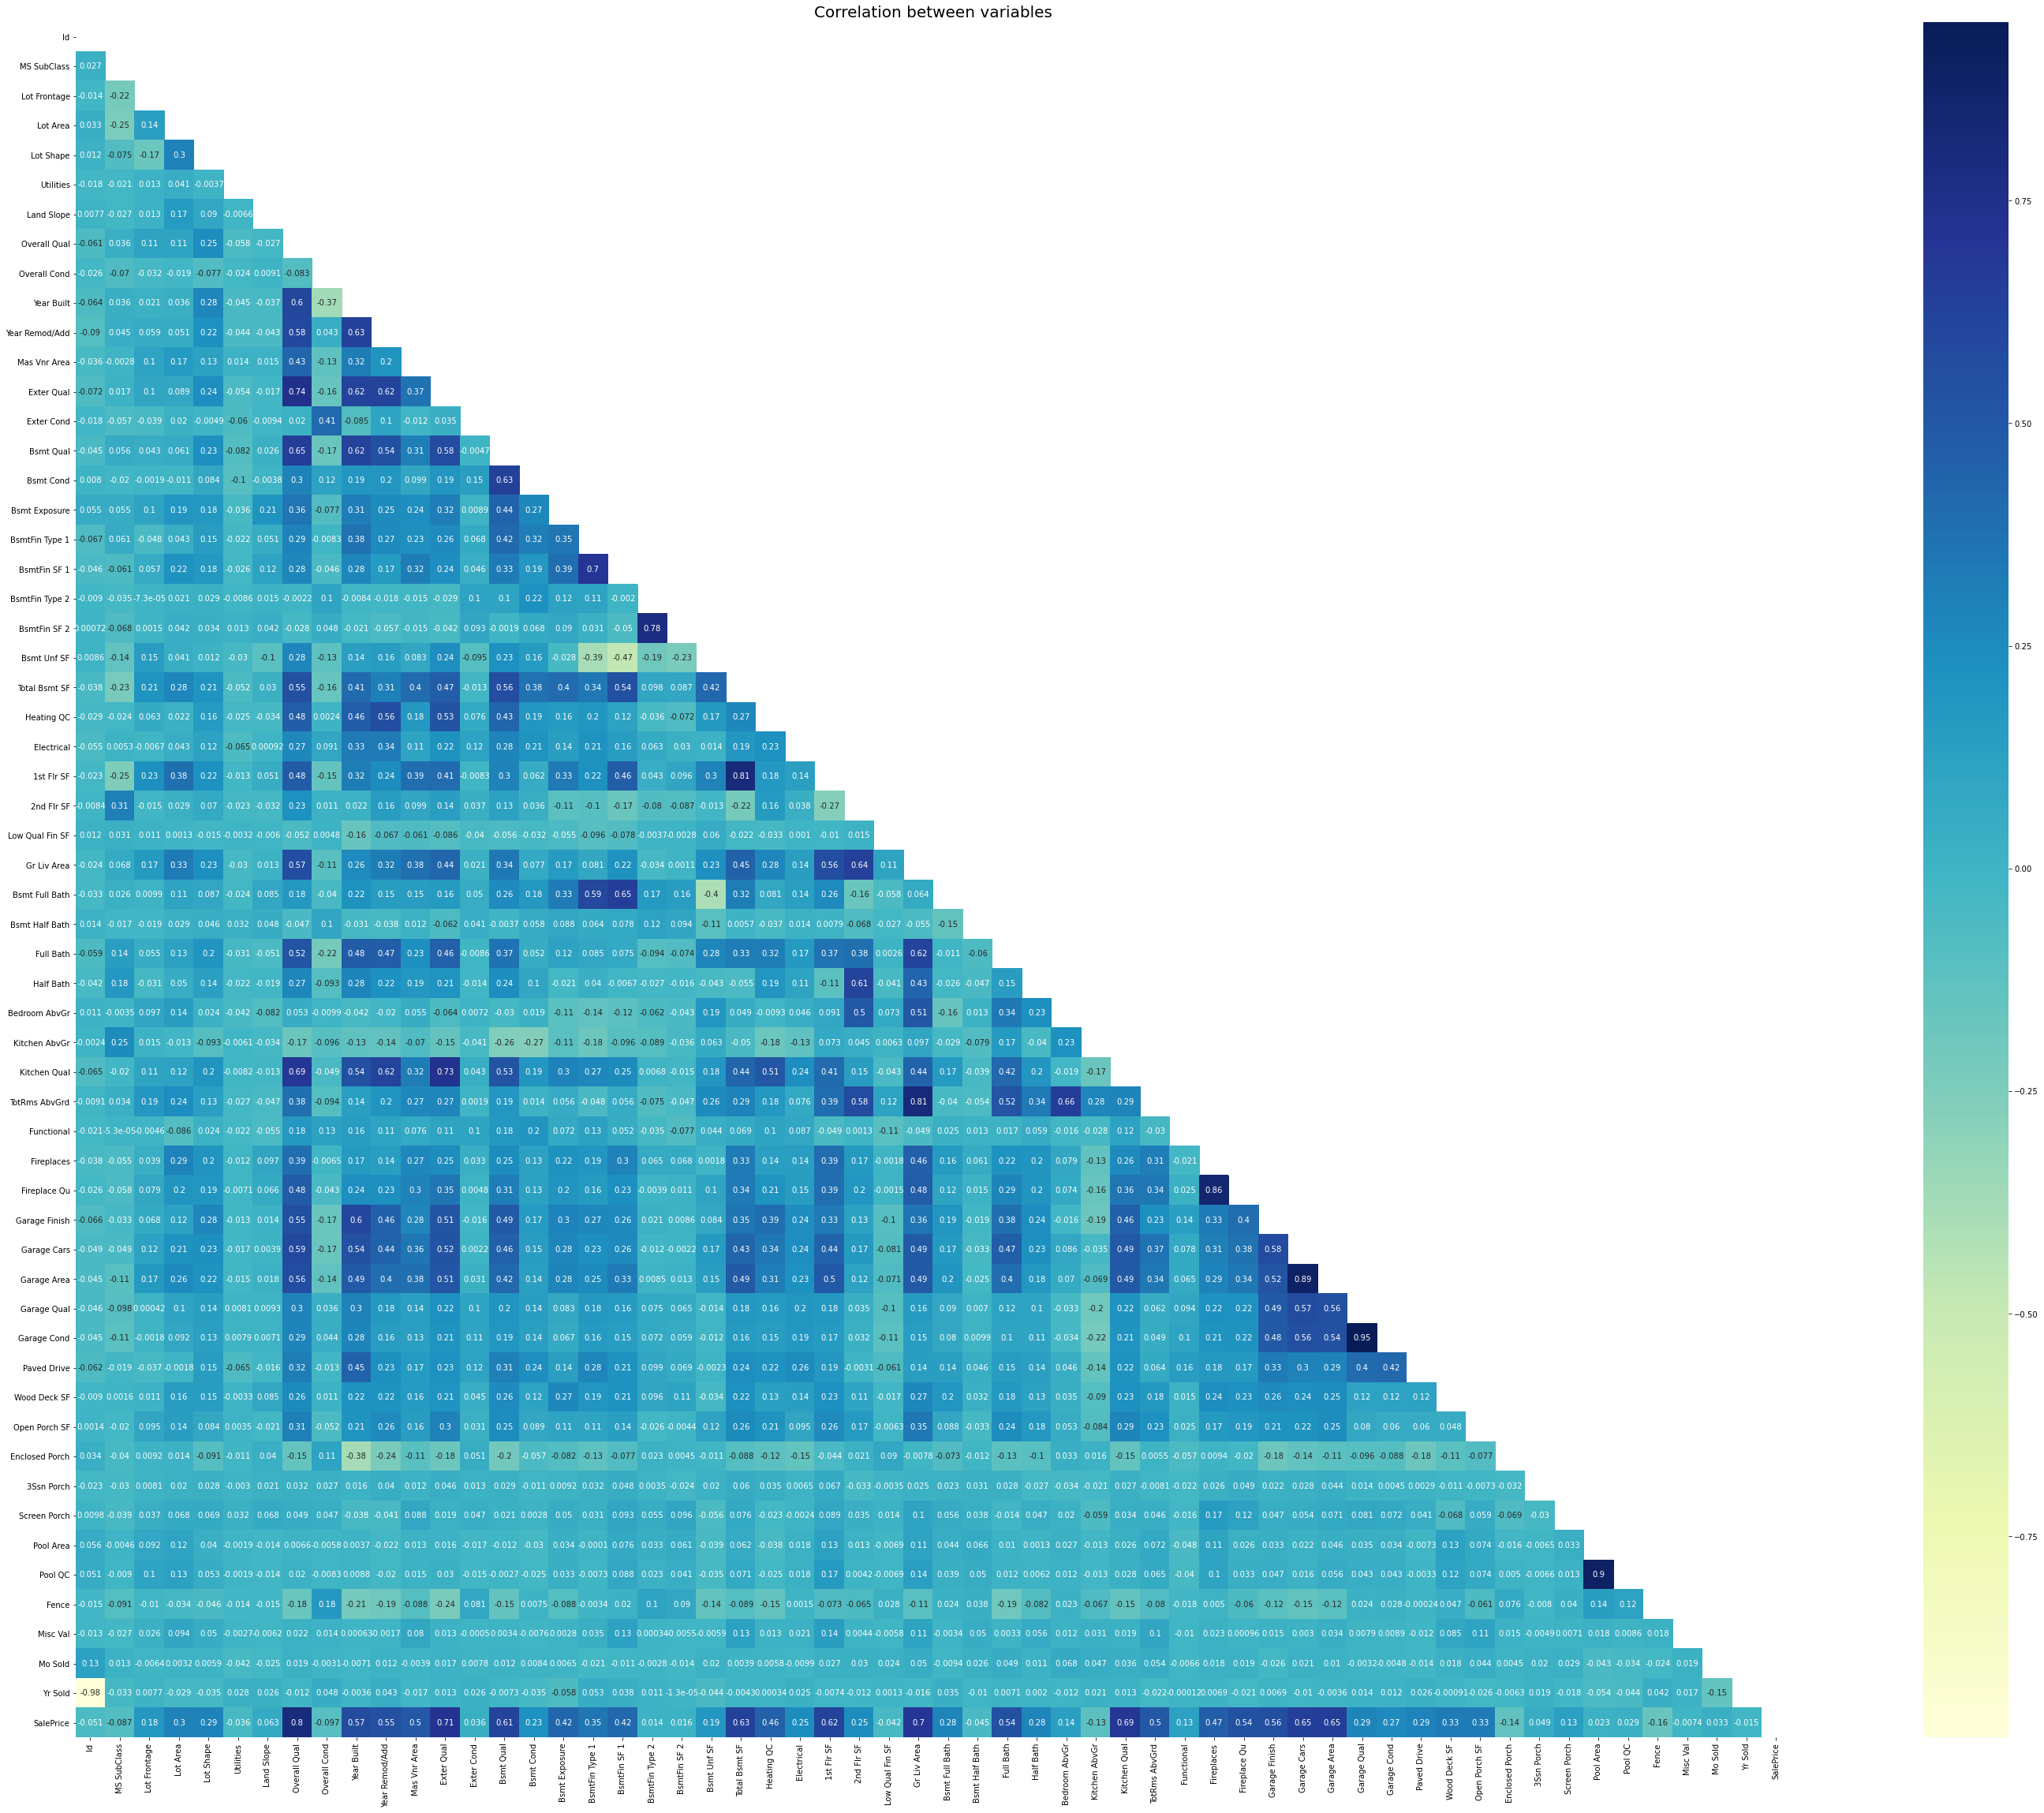

In [141]:
corr = round(df_train.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(60,40))
plt.title('Correlation between variables', fontsize=20)
sns.heatmap(df_train.corr(), mask=mask, square=True, cmap="YlGnBu", annot=True)

### Comment

- These are the variable that has strong to mid positive correlation to Sale Price: 
    - Overall Qual (0.800207) 
    - Exter Qual (0.712146) 
    - Gr Liv Area (0.697038) 
    - Kitchen Qual (0.692336) 
    - Garage Area (0.650246) 
    - Garage Cars (0.648128) 
    - Total Bsmt SF (0.628668) 
    - 1st Flr SF (0.618486) 
    - Bsmt Qual (0.612188)

In [142]:
top_corr = list(df_train.corr()['SalePrice'].sort_values(ascending=False).index[1:10])
top_corr

['Overall Qual',
 'Exter Qual',
 'Gr Liv Area',
 'Kitchen Qual',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Bsmt Qual']

In [143]:
# Lets take a closer look at those variables highly correlated to sale price

fig = px.box(df_train, x='Overall Qual', y='SalePrice', title='Overall Qual vs Sale Price')
fig.show()

## Comment

- There seems to be strong positive correlation between overall quality material and finish of the house. The better the quality the higher the sale price.  

In [144]:
fig = px.box(df_train, x='Exter Qual', y='SalePrice', title='Exter Qual vs Sale Price')
fig.show()

## Comment
- There seems to be a positive correlation between sale price and external quality. 5 is excellent quality of the material on the exterior, 4 is good, 3 is avarage. 
- According to the boxplot, the better the qulity of exterior material, the higher the sale price.

In [145]:
df_train.iplot(kind='bubble',x='Gr Liv Area',y='SalePrice', size='SalePrice',color='firebrick',
              title='Gr Live Area vs Sale Price', xTitle='Gr Liv Area', yTitle='SalePrice')

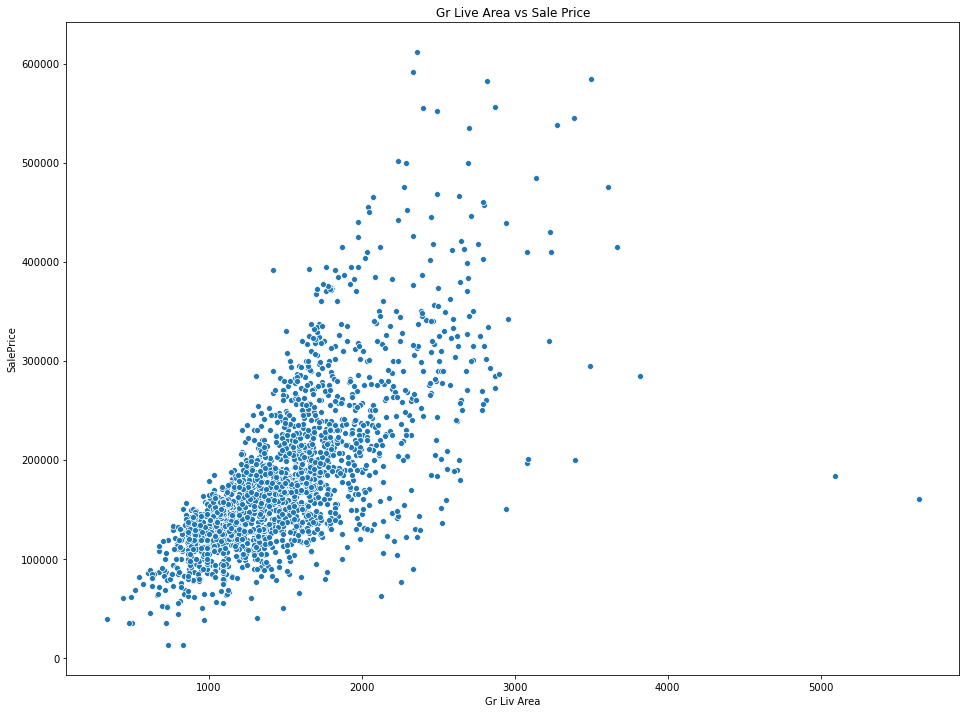

In [146]:
plt.figure(figsize=(16,12))
plt.title('Gr Live Area vs Sale Price')
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_train)

## Comment
- There is a strong positive correlation between sale price and above ground living area square feet. The bigger the living area, the higher the sale price. 
- There seems to be 6 outliers that does not follow the trend, it warrants further investigation. 
- The first two outliers are extremely large houses bigger than 4000 sq feet but the sale price is very low. 
- THe next 4 outliers are large houses around 3000 sq feet but the sale price are below the trend.

In [147]:
fig = px.box(df_train, x='Kitchen Qual', y='SalePrice', title='Kitchen Qual vs Sale Price')
fig.show()

## Comment
- There is a positive correlative between kitchen quality and sale price. The better the kitchen quality the higher the sale price

In [148]:
df_train.iplot(kind='bubble',x='Garage Area',y='SalePrice',size='SalePrice', color='lightcoral',
              title='Garage Area vs Sale Price', xTitle='Garage Area', yTitle='SalePrice')

## Comment
- There seems to be a positive correlation between garage area and sale price. The bigger the garage area, the higher the sale price. 

In [149]:
fig = px.box(df_train, x='Garage Cars', y='SalePrice', title='Garage Cars vs Sale Price')
fig.show()

## Comment
- Garage that can contain 3 cars has the highest sale price. The median sale price is 297K, Q1 at 250K and Q3 at 369K. The spread is big as well. 

In [150]:
df_train.iplot(kind='scatter',x='Total Bsmt SF',y='SalePrice', mode='markers', size=10,
              xTitle='Total Bsmt SF', yTitle='Sale Price', title='Total Bsmt SF vs Sale Price')

## Comment
- There seem to be a positive correlation between total square feet of basement area and sale price. The bigger the basement, the higher the sale price. There seems to be two outliers that warrant further investigation. 

In [151]:
df_train.iplot(kind='scatter',x='1st Flr SF',y='SalePrice', mode='markers', size=10, color='blue',
              xTitle='1st Flr SF', yTitle='Sale Price', title='1st Flr SF SF vs Sale Price')

## Comment
- There seem to be a positive correaltion between first floor square feet and sale price. The bigger the first floor square feet, the higher the sale price. There seems to be three outliers. 

In [152]:
fig = px.box(df_train, x='Bsmt Qual', y='SalePrice', title='Bsmt Qual vs Sale Price')
fig.show()

## Comment
- There seems to be a positive correlation between the hight of the basement and sale price. The higher the height of the basement, the higher the sale price. Basement hight above 100 inches fetches higher sale price. The median sale price is at 319.9K, Q3 at 385K and Q1 at 272K. 

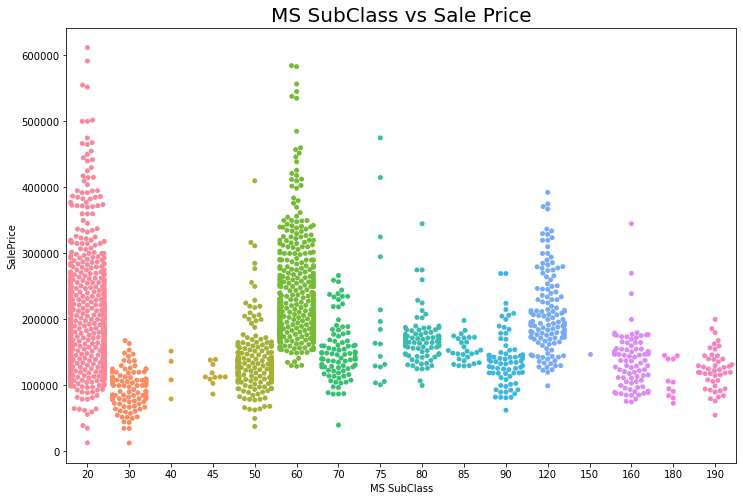

In [153]:
plt.figure(figsize=(12,8))
plt.title('MS SubClass vs Sale Price', fontsize=20)
sns.swarmplot(x='MS SubClass', y='SalePrice', data=df_train)

## Comment
- From the swarm plot, it can be observed that majority of the transaction were 1 story houses (MS SubClass label = 20) that were built in 1946 or newer. This type of house tend to fetch higher sale price as well. 
- 2 story houses (MS SubClass label = 60) that were built in 1946 or newer were also popular houses. This kind of houses fetches the higest sale price. It has the second highest transaction volume. 

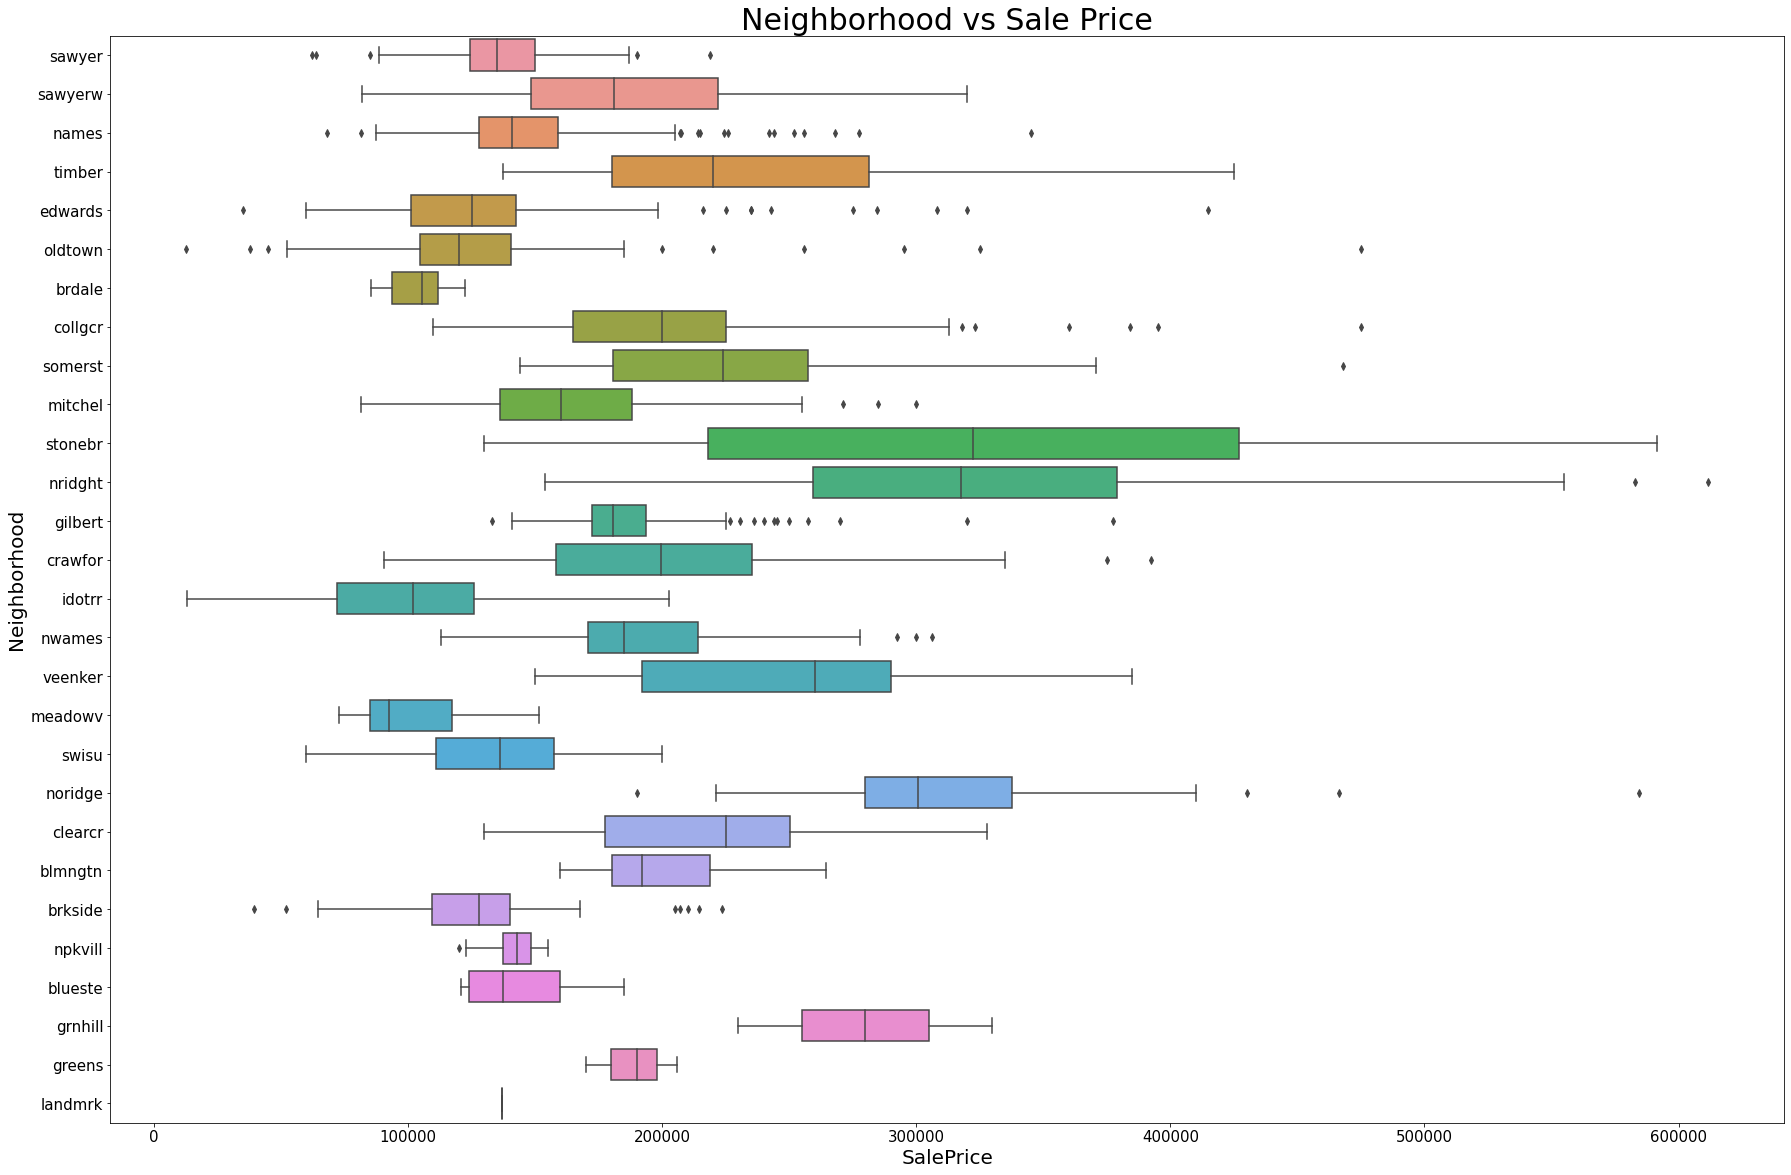

In [154]:
plt.figure(figsize=(30,20))
plt.xlabel('Sale Price',fontsize=20)
plt.ylabel('Neighborhood',fontsize=20)
plt.tick_params(labelsize=15)
plt.title('Neighborhood vs Sale Price', fontsize=30)
sns.boxplot(y='Neighborhood', x='SalePrice', data=df_train, orient='h')

## Comment
- Different neighborhood has a different range of sale price. Houses from stonebr neighborhood fetches the highest sale price however it has a big standard deviation as it is widely spread out. 
- Houses from the nridght neighborhood also fetches high sale price. It has a smaller standard deviation compare to stonebr as the data range is narrower. 
- Both neighborhood has a median around 322K. 

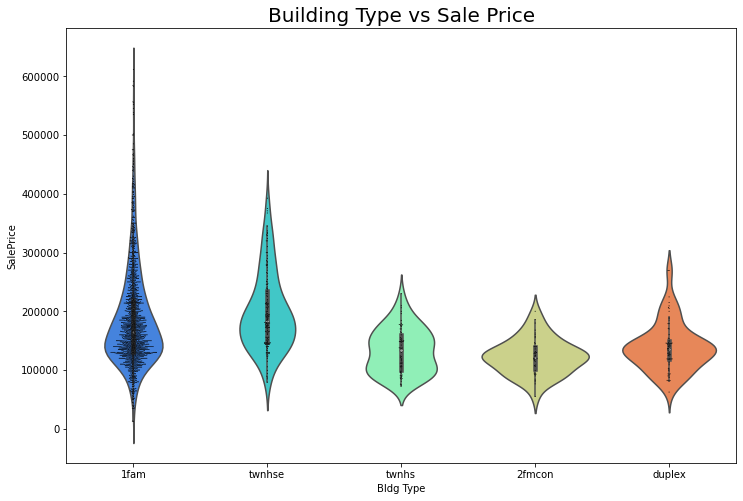

In [155]:
plt.figure(figsize=(12,8))
plt.title('Building Type vs Sale Price', fontsize=20)
sns.violinplot(x='Bldg Type', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Bldg Type', y='SalePrice', data=df_train, color='black', size=1)

## Comment
- Single family detached (1fam) has the highest transaction volume however townhouse end unit (twnhse) seems to have a higher median sale price compare to other building type. 
- Looking at the violin plot, the building types are not normally distributed. Two-family conversion (2fmcon) is the nearest to normal distribution but it is slightly right skewed. 

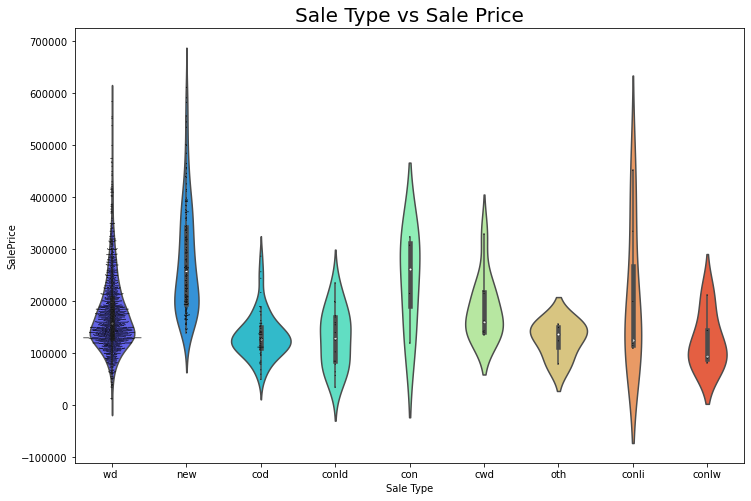

In [156]:
plt.figure(figsize=(12,8))
plt.title('Sale Type vs Sale Price', fontsize=20)
sns.violinplot(x='Sale Type', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Sale Type', y='SalePrice', data=df_train, color='black', size=1)

## Comment
- Highest transaction volume sale type was warranty deed (wd) conventional. 
- Home just constructed and sold (new) tends to fetch higher sale price, it also has the second highest transaction volume. 
- Looking at the violin plot, non of the sale type is normally distributed, they are all skewed. 

In [157]:
# Checking outliers
df_train[df_train['Gr Liv Area']>4000]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,60,rl,313.0,63887,pave,na,4,bnk,1,...,0,480,4,0,na,0,1,2008,new,160000
1885,2181,20,rl,128.0,39290,pave,na,2,bnk,1,...,0,0,0,0,elev,17000,10,2007,new,183850


In [158]:
df_train[(df_train['Gr Liv Area']>2900) & (df_train['SalePrice']<210000)]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
125,1183,60,rl,0.0,24572,pave,na,2,lvl,1,...,0,0,0,0,na,0,6,2008,wd,150000
858,2195,190,rh,60.0,10896,pave,pave,1,bnk,1,...,0,0,0,0,na,0,3,2007,wd,200000
960,1499,60,rl,313.0,63887,pave,na,4,bnk,1,...,0,480,4,0,na,0,1,2008,new,160000
1433,910,75,rl,102.0,15863,pave,na,1,lvl,1,...,0,0,0,0,na,0,8,2009,wd,197000
1563,2046,50,rl,138.0,18030,pave,na,2,bnk,1,...,0,0,0,3,na,0,3,2007,wd,200500
1885,2181,20,rl,128.0,39290,pave,na,2,bnk,1,...,0,0,0,0,elev,17000,10,2007,new,183850


In [159]:
print(len(df_train))

2051


In [160]:
# Remove outliers
df_train.drop([125,858,960,1433,1563,1885], axis=0 ,inplace=True)

In [161]:
print(len(df_train))

2045


## 7. Create Feature Matrix and Target

In [162]:
# Total square footage
df_train["Total SF"] = df_train["Gr Liv Area"] + df_train["BsmtFin SF 1"] + df_train["BsmtFin SF 2"]
df_test["Total SF"] = df_test["Gr Liv Area"] + df_test["BsmtFin SF 1"] + df_test["BsmtFin SF 2"]

# Total bathrooms
df_train["Total Baths"]=(df_train["Full Bath"]+df_train["Half Bath"]+df_train['Bsmt Full Bath']
                         +df_train['Bsmt Half Bath'])
df_test["Total Baths"]=(df_test["Full Bath"]+df_test["Half Bath"]+df_test['Bsmt Full Bath']
                         +df_test['Bsmt Half Bath'])

# Age of building
df_train["Age of Built"] = df_train['Yr Sold'] - df_train['Year Built']
df_test["Age of Built"] = df_test['Yr Sold'] - df_test['Year Built']

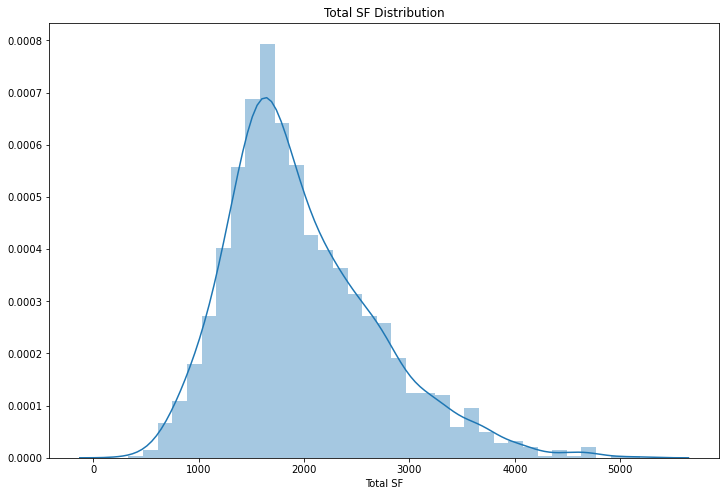

In [163]:
plt.figure(figsize=(12,8))
plt.title('Total SF Distribution')
sns.distplot(df_train['Total SF'])

## Comment
- Total SF is not normally distributed, it is right skewed. The majority of the houses are around 2000 sq feet (including basement area). There are a few big houses around 5000 sq feet (including basement area). 

Text(0.5, 1.0, 'Total SF vs Sale Price')

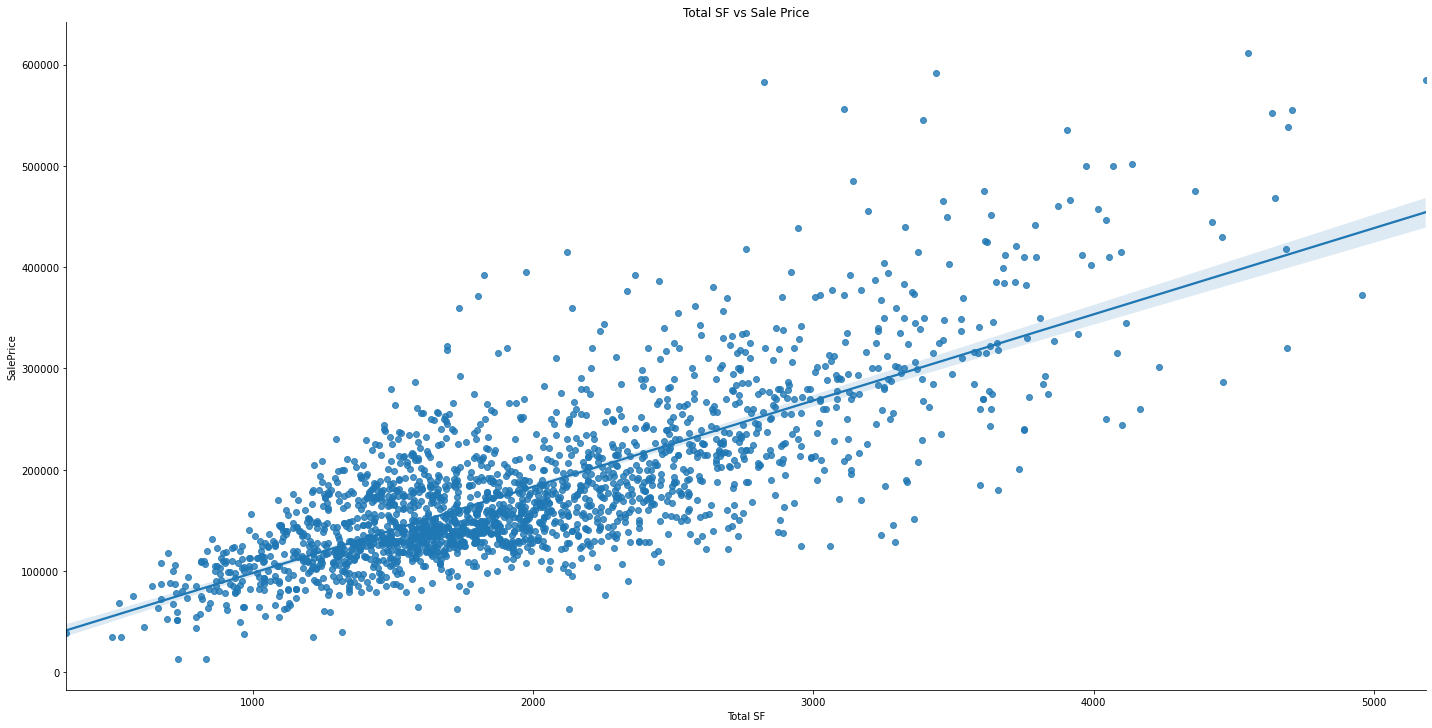

In [164]:
sns.lmplot(x='Total SF', y='SalePrice', data=df_train, height=10, aspect=2)
ax = plt.gca()
ax.set_title('Total SF vs Sale Price')

## Comment
- Total SF and Sale Price seems to be positively correlated. The bigger the total sq feet, the higher the sale price. 

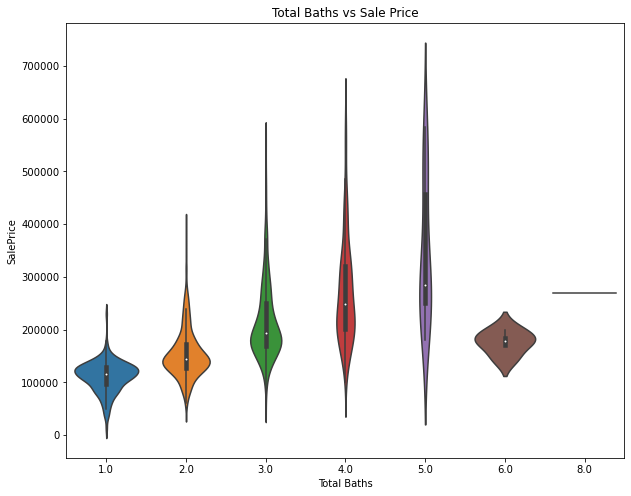

In [165]:
plt.figure(figsize=(10,8))
plt.title('Total Baths vs Sale Price')
sns.violinplot(x = df_train['Total Baths'], y =df_train['SalePrice'])

## Comment
- Looking at the violin plot, there seems to be a very weak positive correlation between total number of baths and sale price. As the number of bath rooms increase, sale price tends to increase however variance increases as well. 
- The variance of houses with one bath room is much smaller than the variance of houses with 5 bath rooms

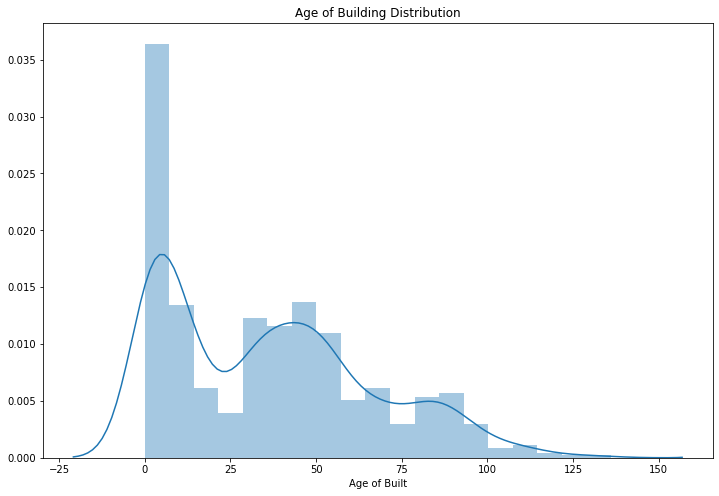

In [166]:
plt.figure(figsize=(12,8))
plt.title('Age of Building Distribution')
sns.distplot(df_train['Age of Built'])

Text(0.5, 1.0, 'Age of Built vs Sale Price')

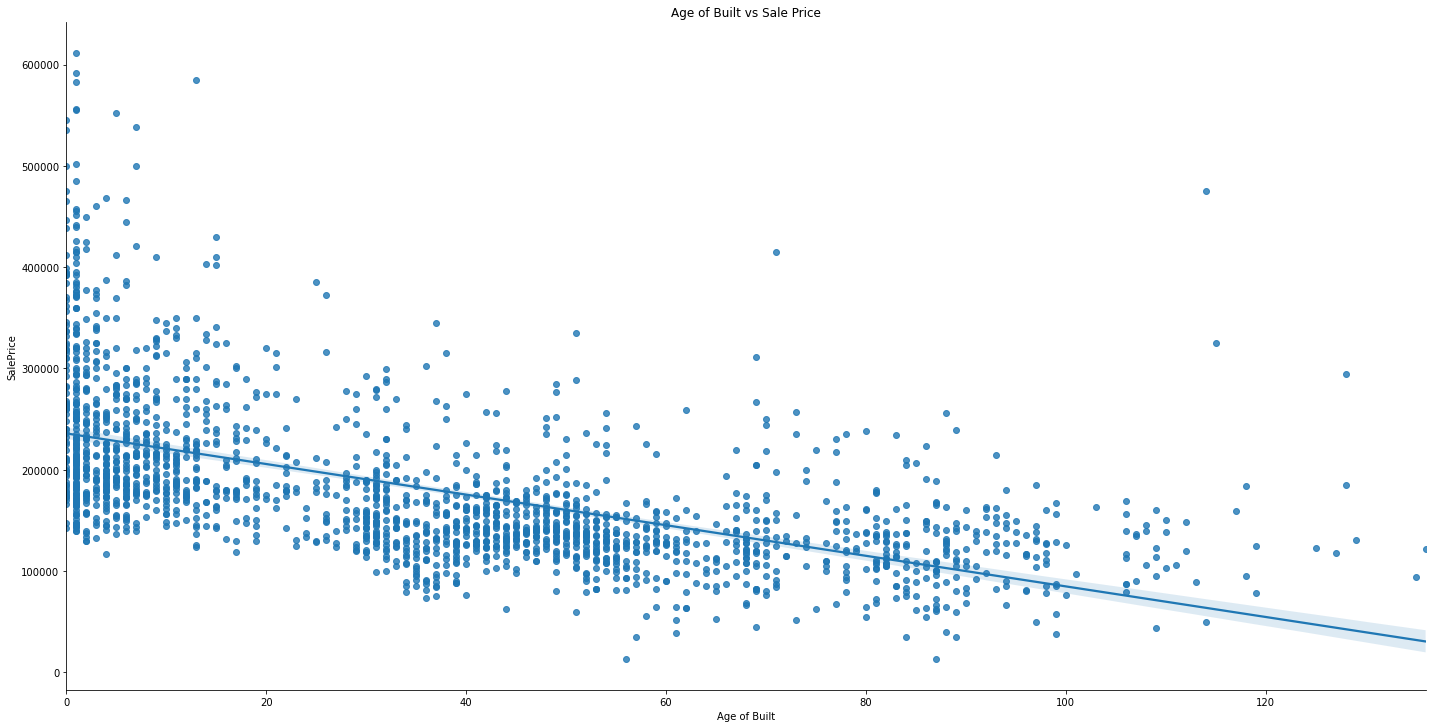

In [167]:
sns.lmplot(x='Age of Built', y='SalePrice', data=df_train, height=10, aspect=2)
ax = plt.gca()
ax.set_title('Age of Built vs Sale Price')

In [168]:
df_train['Age of Built'].describe()

count    2045.000000
mean       36.039120
std        30.179542
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: Age of Built, dtype: float64

## Comment
- Looking at the histogram distribution, age of building is not normally distributed. 
- From the summary statistics, the mean age of the building is 36 years old, the median is 34 years old, the oldest building sold is 136 years old. 
- From the scatter plot, there seems to be a negative correlation between age of building and sale price, the younger the building the higher the sale price. 

In [169]:
# Create dummy variables
df_train = pd.get_dummies(df_train, columns=obj_col, drop_first=True)
df_test = pd.get_dummies(df_test, columns=obj_col, drop_first=True)

In [170]:
# Create X and y variables
features = [col for col in df_train.columns if col != 'SalePrice']
X = df_train[features]
y = df_train['SalePrice']

In [171]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
X.shape

(2045, 198)

In [173]:
df_test.shape

(879, 191)

In [174]:
missing_cols = set(df_train.columns)-set(df_test.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_test = df_test[X.columns]

In [175]:
df_test.shape

(879, 198)

In [176]:
# Scaling
ss = StandardScaler()
scalerX = ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

df_test_sc = ss.fit_transform(df_test)

## 8. Model Selection

## Linear Regression

In [177]:
lr = LinearRegression()

In [178]:
# Perform cross validaton
cross_val_score(lr,X,y,cv=10,scoring='r2')

array([0.90765211, 0.8906016 , 0.90821523, 0.92861306, 0.92798154,
       0.91636052, 0.90459992, 0.91338686, 0.89479115, 0.91743566])

In [179]:
-cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

array([6.57808323e+08, 6.01513173e+08, 5.08470306e+08, 4.54436373e+08,
       4.09661703e+08, 6.00752054e+08, 5.27967206e+08, 5.14211486e+08,
       8.59756724e+08, 4.78113075e+08])

In [180]:
# fit model
lr.fit(X_train, y_train)

LinearRegression()

In [181]:
lr.score(X_train,y_train)

0.9329684398128227

In [182]:
lr.score(X_test, y_test)

-36852813.644499026

In [183]:
y_lr_pred = lr.predict(X_test)

In [184]:
r2_score(y_test,y_lr_pred)

-36852813.644499026

In [185]:
(mean_squared_error(y_test, y_lr_pred))**0.5

459252881.9169111

## Comments
The mean R^2 is extremely negative. All the R^2 scores are negative in crossvalidation. The linear regression is performing far worse on the test sets. It is probably dramatically overfitting and the redundant variables are affecting the coefficients in weird ways.

## Lasso

In [186]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

428.02715209851516


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.3s finished


In [187]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

In [188]:
-cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error').mean()

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 424041839738.30005, tolerance: 1141531515.8824031

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 460328379679.53845, tolerance: 1172811243.8008757

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 442588867432.56104, tolerance: 1173988854.5493803

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iter

611010758.782011

In [189]:
lasso_scores = cross_val_score(lasso, X, y, cv=10, scoring='r2')
lasso_scores.mean()

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 424041839738.30005, tolerance: 1141531515.8824031

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 460328379679.53845, tolerance: 1172811243.8008757

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 442588867432.56104, tolerance: 1173988854.5493803

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iter

0.9029294144587455

In [190]:
lasso.fit(X_train,y_train)

Lasso(alpha=428.02715209851516)

In [191]:
lasso.score(X_train,y_train)

0.926859320917655

In [192]:
lasso.score(X_test, y_test)

0.9239599938526952

In [193]:
lasso_train_pred = lasso.predict(X_test)
(mean_squared_error(y_test, lasso_train_pred))**0.5

20861.12044341377

In [194]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

,variable,coef,abs_coef
28,Gr Liv Area,15372.182593,15372.182593
57,Total SF,14674.081714,14674.081714
7,Overall Qual,12176.522927,12176.522927
93,Neighborhood_nridght,7358.924978,7358.924978
11,Mas Vnr Area,6377.218400,6377.218400
9,Year Built,5664.656752,5664.656752
12,Exter Qual,5364.013689,5364.013689
22,Total Bsmt SF,5290.883376,5290.883376
42,Garage Area,4987.315022,4987.315022
195,Sale Type_new,4722.960848,4722.960848


$$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\sum_{j=1}^p |\beta_j|$$

## Comment
- Lasso regression penalizes the model for having large coefficients. As alpha increases, Bj will decrease, even to the point of zero.
- From the model, it can be observed that it has a high mean cross_val_score (0.903), a high r2 score (0.927) of for both training and testing set(0.924). r2 on unseen data is slightly higher than baseline score. The RMSE is 20861.12
- The high r2 score means that the model is able to explain over 90% of sale price variation. 

## Ridge

In [195]:
# Baseline Model
ridge_alphas = np.linspace(.1,500,100)

In [196]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train,y_train)
print(optimal_ridge.alpha_)

191.9808080808081


In [197]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

In [198]:
-cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error').mean()

593518515.6659873

In [199]:
cross_val_score(ridge, X,y,cv=10, scoring='r2').mean()

0.9058303898958654

In [200]:
ridge.fit(X_train, y_train)

Ridge(alpha=191.9808080808081)

In [201]:
ridge.score(X_train, y_train)

0.9297560828130443

In [202]:
ridge.score(X_test, y_test)

0.9193003193493785

In [203]:
ridge_train_pred = ridge.predict(X_test)
(mean_squared_error(y_test, ridge_train_pred))**0.5

21490.794280549766


$$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\sum_{j=1}^p \beta_j^2$$

## Comment
- So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.
- From the model, it can be observed that it has a high mean cross_val_score (0.906), a high r2 score (0.930) of for both training and testing set(0.920). The RMSE is 21490. 
- The high r2 score means that the model is able to explain over 90% of sale price variation. I will use ridge as the baseline model and it's r2 as the baseline score. 

## ElasticNet

In [204]:
l1_ratios = np.linspace(0.01, 1.0, 25)

In [205]:
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)

In [206]:
optimal_enet.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.............................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   18.7s finished


ElasticNetCV(cv=10,
             l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]),
             verbose=1)

In [207]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

In [208]:
-cross_val_score(enet, X, y, cv=10, scoring='neg_mean_squared_error').mean()

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 423286485114.0358, tolerance: 1141531515.8824031

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 459983696118.5692, tolerance: 1172811243.8008757

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 441942327186.8783, tolerance: 1173988854.5493803

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterati

610123884.3136857

In [209]:
cross_val_score(enet, X, y, cv=10).mean()

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 423286485114.0358, tolerance: 1141531515.8824031

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 459983696118.5692, tolerance: 1172811243.8008757

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 441942327186.8783, tolerance: 1173988854.5493803

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterati

0.9030654145799583

In [210]:
enet.fit(X_train, y_train)

ElasticNet(alpha=422.67430103450386, l1_ratio=1.0)

In [211]:
enet.score(X_train, y_train)

0.9269355257456197

In [212]:
enet.score(X_test, y_test)

0.9238966445343999

In [213]:
enet_train_pred = enet.predict(X_test)
(mean_squared_error(y_test, enet_train_pred))**0.5

20869.808387402314

In [214]:
enet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

enet_coefs.head(10)

,variable,coef,abs_coef
28,Gr Liv Area,15392.578478,15392.578478
57,Total SF,14653.141954,14653.141954
7,Overall Qual,12166.432005,12166.432005
93,Neighborhood_nridght,7356.733275,7356.733275
11,Mas Vnr Area,6383.200002,6383.200002
9,Year Built,5680.984861,5680.984861
12,Exter Qual,5355.114319,5355.114319
22,Total Bsmt SF,5299.163138,5299.163138
42,Garage Area,4982.270787,4982.270787
195,Sale Type_new,4721.711509,4721.711509


$$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\rho\sum_{j=1}^p |\beta_j| + \alpha(1-\rho)\sum_{j=1}^p \beta_j^2$$

In the elastic net, the effect of the ridge versus the lasso is balanced by the $\rho$ parameter. It is the ratio of Lasso penalty to Ridge penalty and must be between zero and one.

ElasticNet in sklearn has two parameters:

alpha: the regularization strength.
l1_ratio: the amount of L1 vs L2 penalty (i.e., $\rho$). An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.

## Comment
- From the model, it can be observed that it has a high mean cross_val_score (0.903), a high r2 score (0.927) for both training and testing set(0.924). r2 on unseen data is slightly higher than baseline score. 
- The high r2 score means that the model is able to explain over 90% of sale price variation. The RMSE is 20869.808
- The optimal l1_ratio is 1, which shows that Lasso model was found to be optimal. 

## 9. Output Model Predictions

In [215]:
y_pred = enet.predict(df_test_sc)

In [216]:
y_pred.shape

(879,)

In [217]:
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
submission['Id'] = df_test['Id']
submission = submission[['Id', 'SalePrice']]

In [218]:
submission.head()

,Id,SalePrice
0,2658,131741.896406
1,2718,154399.564100
2,2414,222790.658796
3,1989,115081.763805
4,625,175401.625797


In [219]:
submission.to_csv('submission_01', index=False)

In [220]:
y_pred_2 = lasso.predict(df_test_sc)

In [221]:
submission_02 = pd.DataFrame(y_pred_2, columns=['SalePrice'])
submission_02['Id'] = df_test['Id']
submission_02 = submission_02[['Id', 'SalePrice']]

In [222]:
submission_02.head()

,Id,SalePrice
0,2658,131706.111645
1,2718,154481.054187
2,2414,222796.055552
3,1989,115113.027257
4,625,175411.040084


In [223]:
submission_02.to_csv('submission_02', index=False)

<div>
<img src="submission_pic.png" width="1000"/>
</div>

## Comment

- I have selected LASSO as my preferred model, it gives a very good prediction accuracy (a high r2 score), because shrinking and removing the coefficients can reduce variance without a substantial increase of the bias. 
- Moreover the LASSO helps to increase the model interpretability by eliminating irrelevant variables that are not associated with the response variable,this way also overfitting is reduced.
- One disadvantage of LASSO is the tuning of parameter alpha, bias increases and variance decreases when λ increases, indeed a trade-off between bias and variance has to be found.
- Out of curosity, I have also made a submission using Elastic Net (submission_01), it seems to do slightly better in Kaggle. 

## 10. Business Recommendations

In [224]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

,variable,coef,abs_coef
28,Gr Liv Area,15372.182593,15372.182593
57,Total SF,14674.081714,14674.081714
7,Overall Qual,12176.522927,12176.522927
93,Neighborhood_nridght,7358.924978,7358.924978
11,Mas Vnr Area,6377.218400,6377.218400
9,Year Built,5664.656752,5664.656752
12,Exter Qual,5364.013689,5364.013689
22,Total Bsmt SF,5290.883376,5290.883376
42,Garage Area,4987.315022,4987.315022
195,Sale Type_new,4722.960848,4722.960848


In [225]:
# Scale back the coefficients 
lasso_coef = pd.DataFrame(
    data={
        'scaleX' : scalerX.scale_,
        'norm_coef' : lasso.coef_
    },
    columns=[ 'norm_coef', 'scaleX']
)
lasso_coef['rescaled_coef'] = lasso_coef.norm_coef / lasso_coef.scaleX
lasso_coef=lasso_coef.T
lasso_coef.T.reset_index(drop=True, inplace=True)
lasso_coef.columns = X.columns

In [226]:
variables = ['Gr Liv Area', 'Total SF', 'Overall Qual', 'Neighborhood_nridght', 'Mas Vnr Area', 
            'Year Built', 'Exter Qual', 'Total Bsmt SF', 'Garage Area', 'Sale Type_new']
lasso_coef[variables]

,Gr Liv Area,Total SF,Overall Qual,Neighborhood_nridght,Mas Vnr Area,Year Built,Exter Qual,Total Bsmt SF,Garage Area,Sale Type_new
norm_coef,15372.182593,14674.081714,12176.522927,7358.924978,6377.218400,5664.656752,5364.013689,5290.883376,4987.315022,4722.960848
scaleX,517.118857,751.046659,1.373973,0.218062,188.176983,30.386227,0.561696,419.019874,212.948921,0.286002
rescaled_coef,29.726595,19.538176,8862.269537,33746.883676,33.889471,186.421850,9549.675709,12.626808,23.420241,16513.711053


## Comment
The recommendation will be based on Lasso model and inferential statistics. The recommendations will be relevant to the following stakeholders: home buyers, housing agent, developers and home sellers. Recommendations will be given in 4 broad categories, they are: living space, quality of house, location and age of building. (Note: I will use only the top 10 coefficients, including too many variables might overwhelm stakeholders besides that these coefficients are most relevant based on domin knowledge.) 

### The first category is living space. Based on the lasso model, the following coefficients related to living space are significant: 
    - Gr Liv Area = Above (ground) living area square feet (A one unit change in above ground living area, the sale price will increase by 29.7 dollar, holding others constant)
    
    - Total SF = Total area both above ground and below ground square feet (A one unit change in total area, the sale price will increase by 19.5 dollar, holding others constant.)
    
    - Mas Vnr Area = Masonry veneer area in square feet (A one unit change in mansory veneer area, the sale price will increase by 33.9 dollar, holding others constant.)
    
    - Total Bsmt SF = Total square feet of basement area (A one unit change in total basement area, the sale price will increase by 12.6 dollar, holding others constant.)
    
    - Garage Area = Size of garage in square feet (A one unit change in garage area, the sale price will increase by 23.4 dollar, holding others contant.)

#### Implications for stakeholders

- Home Buyers
    - Home buyers can use living space to estimate the actual price of the house. Normally, sellers or agents will post a higher price on property portals to fetch the highest selling price. Home buyers can have a rough estimate of the actual price by assessing the above ground living area, total living area. As such, home buyers can give an appropriate offer to the seller so as to enhance the opportunity of securing the property. 
    - Home buyers needs to know, living area, total basement area and garage area are strongly positive correlated to sale price. When home buyers are thinking of buying large living area, big basement and garage that can park many cars, buyers will have to prepare to pay more and give a higher offer. Generally buyers on a tight budget should avoid looking for big houses however there can be outliers (as seen in the data). 
    
- Home sellers, devleopers, housing agent (I will call them sellers in general)
    - Sellers, developers and agents when marketing their property, they should leverage on living area to achieve a better bargain. Living area should include basement area and garage area as they have an impact on selling price. 
    - Sellers will also need to highlight the masnory veneer area as well to boost sale price. Sellers need to know, these areas are positively correlated to sale price. Meaning, the bigger the area, the higher the sale price. Therefore, small houses should not be asking for a high sale price otherwise no buyer would buy. 
    - Developers, when there is a limit on how big the house can be built above ground, developers should also be mindful to maximise space in the basement to fetch a higher selling price.  
  
### The second category is the Quality of house. Based on lasso model, the following coefficients related to quality of house are signficant:
    - Overall Qual = Rates the overall material and finish of the house (A one unit increase in overall material, the sale price will increase by 8862 dollar, holding others constant.)
   
    - Exter Qual = Evaluates the quality of the material on the exterior (A one unit increase in exterior quality, the sale price will increase by 9549 dollar, holding others constant.)
    
#### Implications for stakeholders
- Home Buyers
    - Before buying a property, buyers should assess the overall material finish of the house. Houses that have execellent material finish tends to have a higher sale price as the two variables are positively correlated. Therefore, buyers need to give a higher offer to house that has a better material finish (holding other variables constant) so as to increase the probability of the offer being accepted. 
- Home sellers, devleopers, housing agent (I will call them sellers in general)
    - Sellers could highlight the material quality of the house during marketing. For developers, in order to sell the house at a premium, the developer can use quality materials and ensure good worksmanship.
    - Sellers could renovate their house or at the least renovate the exterior to boost sale price. 

### The third category is Location. Based on lasso model, Northridge Heights was found to be significant. 

    - If the property is a Northridge Heights, the sale price will increase by 33746 dollar, holding other variables constant.  
    
- Based on the lasso model, houses at Northridge Heights (NH) tend to have a higher sale price. Based on outside research, the NH population is highly educated, 74% of the population has an associate degree or higher (see figure 1). Secondly, NH also has a very high median income 105,583 usd which is much higher than the national average of 33,706 usd (see figure 2). Besides that, NH houses also tends to have high rental yield (see figure 3), its rental yield is comparable to large cities such as Indianapolis. NH also enforce strict smoking ban in workplace, bars and restaurants which make the environment more livable. Lastly, the crime rate at NH is generally low compare to national average (see figrue 4). These could the reasons for NH houses having a higher sale price.  

#### Implications for stakeholders
- Home Buyers
    - Home buyers needs to prepare to pay higher price for houses in NH, in exchange for a comfortable living environment. 
- Home sellers, devleopers, housing agent (I will call them sellers in general)
    - Sellers can leverage on NH's good living environment to maximise sale price. Sellers can highlight high rental yield, low crime rate and convenience of the neighborhood. 
    - Developers can consider bidding for land at NH, higher sale price could translate to higher profit (assuming cost is constant)
    

### The fourth category is Age of building. Based on lasso model, the following coefficients related to age of building are significant: 
    - Sale Type New = Home just constructed and sold (If it is new home, the sale price would increase by 16513 dollar, holding other variables constant.)
    
    - Year Built (A one unit increase in year built i.e the house is younger, the sale price would increase by 186 dollar, holding other variables constant.)
 
#### Implications for stakeholders
- Home Buyers
    - Buyers need to prepare to pay higher price for new houses. Perhaps, new houses has lesser defects, does not require repairs. Buyers also can renovate the house to his/her liking. 
- Home sellers, devleopers, housing agent (I will call them sellers in general)
    - It is good news for developers, the positive correlation between age of of building and sale price means that Ames is a city worth investing in for developers. The high sale price means there is demand for new buildings. 
    - Developers and agents could highlight the young age of the building in their marketing effort. It could also highlight the new amenities that come along with the new building. 
    
    
    
    
citation: 
https://www.businessinsider.com/cost-to-rent-2-bed-apartment-us-cities-2018-10#25-memphis-tennessee-1
https://www.weichert.com/search/community/neighborhood.aspx?hood=60290

Figure 1: Higest Education Obtained in Northridge Height Population
<div>
<img src="highest_education.png" width="750"/>
</div>

Figure 2: Median Income of Northridge Height
<div>
<img src="median_income.png" width="1000"/>
</div>

Figure 3: Rental Yield of Northridge Height 
<div>
<img src="market_rent_and_smoking.png" width="1000"/>
</div>

Figure 4: Crime rate of Northridge Height compare to National Average
<div>
<img src="crime.png" width="1000"/>
</div>

## 11. Future Steps
- In the future, demographic data could be included so data scientist can examine who is willing to pay higher price, popular location, buyers are willing to pay for what kind of features. This woud provide an overall picture to data scientist and stakeholders.
- Moving on, during data collection, measures need to be taken to deal with missing data. For example, making certain features compulsory to answer and making sure the entry make sense. This would make analysis more accurate.  